In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import mne
from utils.loader import load_data, unicorn_fs, convert_to_mne, unicorn_eeg_channels
%matplotlib inline
# matplotlib.use("Qt5Agg")

path_recordings = "data/recordings"
unicorn_channels = ["Fz", "C3", "Cz", "C4", "Pz", "PO7", "Oz", "PO8", "acc_x", "acc_y", "acc_z"]

#### Visualize an example of the data structure

1. dataframe
2. trigger
3. eeg
4. accelerations

        Fz     C3     Cz     C4      Pz    PO7     Oz     PO8  acc_x  acc_y  \
0   -5.129 -7.809  1.602  4.105  -0.461  3.334  6.625   7.785    0.0    NaN   
1   -5.752 -8.187  2.372  3.174  -0.838  3.799  5.978   5.148    0.0    NaN   
2   -6.222 -8.359  3.044  2.829  -0.675  2.102  5.216   3.202    0.0    NaN   
3   -6.118 -8.563  3.112  3.218  -0.069 -1.312  4.824   1.857    0.0    NaN   
4   -5.340 -8.824  2.333  4.129   0.640 -5.318  5.059   0.805    0.0    NaN   
..     ...    ...    ...    ...     ...    ...    ...     ...    ...    ...   
934 -4.294  2.598  3.773 -3.150   5.885  8.248  4.081  10.239    0.0    NaN   
935 -7.278  3.208  4.194 -2.880  10.810  8.621  4.214  10.515    0.0    NaN   
936 -9.213  3.603  3.264 -2.712  14.773  8.245  4.643  11.153    0.0    NaN   
937 -9.521  3.868  1.373 -2.543  16.829  7.346  5.458  11.850    0.0    NaN   
938 -8.017  3.898 -0.489 -2.224  16.860  6.340  6.640  12.304    0.0    NaN   

     acc_z  STI  
0      NaN  NaN  
1      NaN  NaN

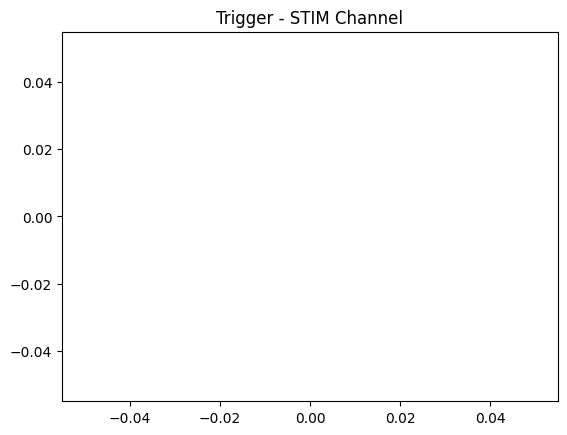

Creating RawArray with float64 data, n_channels=8, n_times=939
    Range : 0 ... 938 =      0.000 ...     3.752 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=939
    Range : 0 ... 938 =      0.000 ...     3.752 secs
Ready.
Using matplotlib as 2D backend.


C:\Users\Gianni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mne\viz\_figure.py:372: RuntimeWarning: Mean of empty slice
  data -= np.nanmean(data, axis=1, keepdims=True)


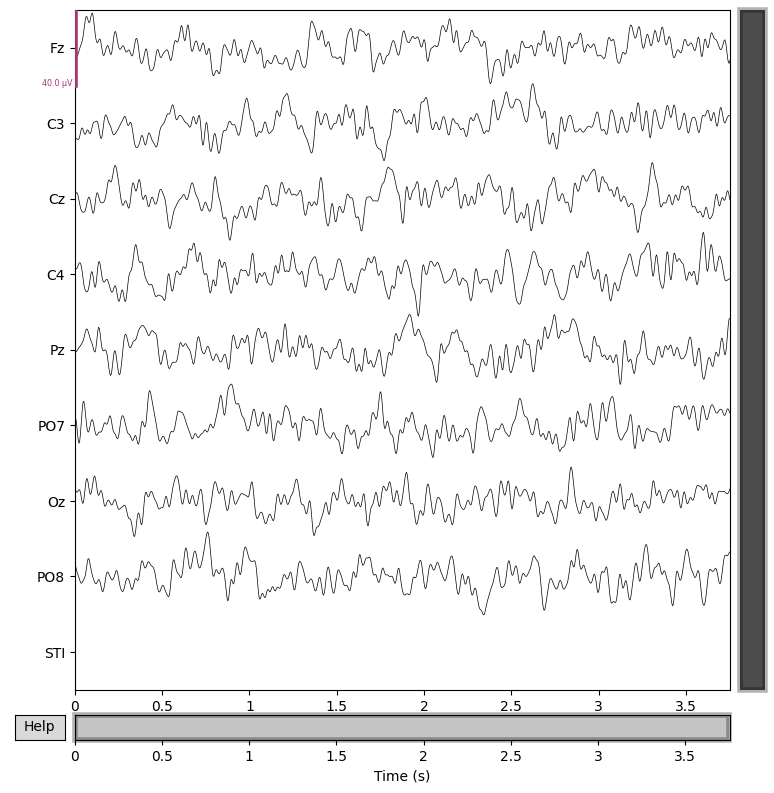

Effective window size : 3.756 (s)


C:\Users\Gianni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)




Power Spectral Density (PSD)


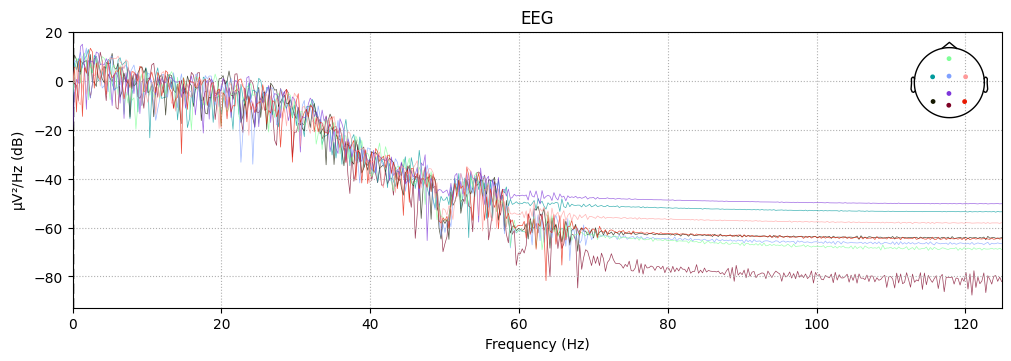

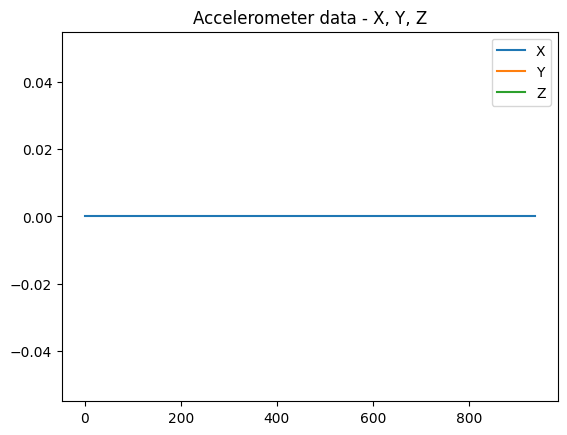

In [2]:
path_folder = os.path.join(path_recordings, 'recordings_04_04_2024_OSCAR/listening/relax')
files = [f for f in os.listdir(path_folder) if f.endswith('.csv')]
path_file = os.path.join(path_folder, files[0])

names = unicorn_channels

# Load data
eeg, trigger, dataframe = load_data(path_file, header=False, fs=unicorn_fs, skiprows=5, names = names)

# Print data
print(dataframe)

# Plot trigger channel
plt.plot(trigger)
plt.title('Trigger - STIM Channel')
plt.show()
plt.close()

# Plot EEG data
raw_data = convert_to_mne(eeg, trigger, fs=unicorn_fs, chs=unicorn_eeg_channels, recompute=False) 
raw_data.plot()

# Compute PSD
Pxx = raw_data.compute_psd(fmin=0, fmax=unicorn_fs/2)
Pxx.plot()
print('\n\nPower Spectral Density (PSD)')
plt.show()
plt.close()

# Plot accelerometer data
acc = np.array([dataframe.acc_x, dataframe.acc_y, dataframe.acc_z])   
acc = acc.T 
plt.plot(acc)
plt.title('Accelerometer data - X, Y, Z')
plt.legend(['X', 'Y', 'Z'])
plt.show()
plt.close()

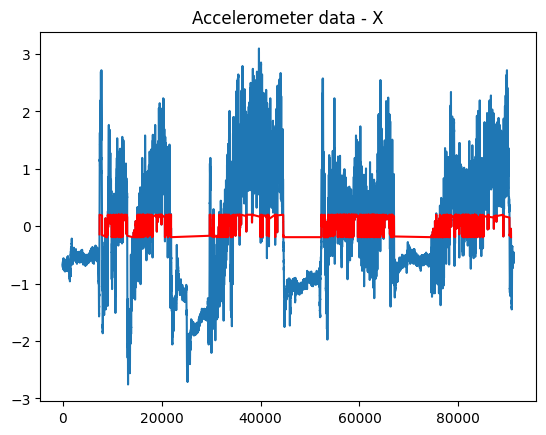

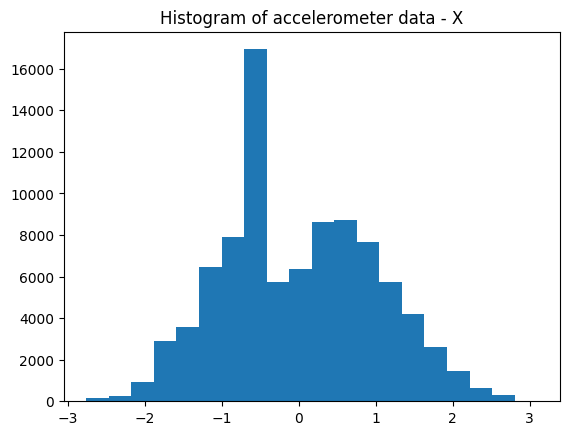

In [46]:
TH = 0.2

# extract accelerometer data 
acc_x = dataframe.acc_z
acc_x = np.array(acc_x)

# normalize data numpy
acc_x_norm = (acc_x - np.mean(acc_x)) / np.std(acc_x)

# filter data
below_th = acc_x_norm < TH # boolean array
above_th = acc_x_norm > -TH

# extract indexes 
filtered_acc = np.where(np.logical_and(above_th, below_th))[0]


if len(filtered_acc) > 0:
    plt.plot(acc_x_norm)
    plt.plot(filtered_acc, acc_x_norm[filtered_acc], 'r')
    plt.title('Accelerometer data - X')
    plt.show()
    plt.close()
else:
    print('No peaks found')

# ploy histogram
plt.hist(acc_x_norm, bins=20)
plt.title('Histogram of accelerometer data - X')
plt.show()
plt.close()

(8680,)
(8, 91180)


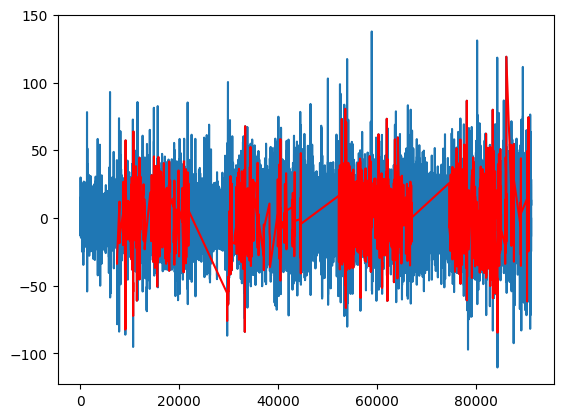

In [47]:
# get dataframe data from indexes
print(filtered_acc.shape)

eeg_transposed = eeg.T

print(eeg_transposed.shape)

plt.close()
plt.plot(eeg_transposed[0])
plt.plot(filtered_acc, eeg_transposed[0][filtered_acc], 'r')
plt.show()